## input file/key file ##

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# scipy interploate function, can get any value between the range,
# using the interpolation of nearest two point.
from scipy.interpolate import interp1d

In [2]:
# objective table
summary_table = pd.DataFrame(
    {
        "LC": ["LCT-19-580", "MOX-1"],
        "platform": ["6515", "Realme X50"],
        "Vop(V)": [5.18, np.nan],
        "V%": [99, np.nan],
        "Δnd(nm)": [289, 313],
        "Gap(um)": [2.5, 2.57],
        "Wx": [0.2588, np.nan],
        "Wx_gain": [0, np.nan],
        "Wy": [0.272725, np.nan],
        "Wy_gain": [0, np.nan],
        "LC%": [np.nan, 75.8],
        "Tr(ms)": [6.4125, 5.9],
        "Tf(ms)": [6.318, 5.6],
        "RT(ms)": [12.728, 11.5],
        "G2G(ms)": [15.57, 14],
        "CR": [1410.8, 1419],
        "ΔCR": [0, np.nan],
        "T%": [0.041885, np.nan],
    }
)

In [3]:
summary_table

,LC,platform,Vop(V),V%,Δnd(nm),Gap(um),Wx,Wx_gain,Wy,Wy_gain,LC%,Tr(ms),Tf(ms),RT(ms),G2G(ms),CR,ΔCR,T%
0,LCT-19-580,6515,5.18,99.0,289,2.50,0.2588,0.0,0.272725,0.0,NaN,6.4125,6.318,12.728,15.57,1410.8,0.0,0.041885
1,MOX-1,Realme X50,NaN,NaN,313,2.57,NaN,NaN,NaN,NaN,75.8,5.9000,5.600,11.500,14.00,1419.0,NaN,NaN


In [4]:
# LC properties
properties = pd.DataFrame(
    {
        "LC": ["LCT-19-580", "MOX-1"],
        "Δn": [0.1155, 0.1292],
        "Scattering_idx((ne^2-no^2)/K_avg)": [0.0087, 0.0134],
        "RT_idx(γ1/k_22)": [11.0959, 11.3287],
    }
)
properties

,LC,Δn,Scattering_idx((ne^2-no^2)/K_avg),RT_idx(γ1/k_22)
0,LCT-19-580,0.1155,0.0087,11.0959
1,MOX-1,0.1292,0.0134,11.3287


In [5]:
# environment
sns.set_theme()
# plt.rcParams["font.family"] = "Microsoft YaHei"
plt.rcParams["font.family"] = "Sans-serif"

path = {
    "root": r".",
    "raw": "RAW", # raw folder
    "cond": "CONDITIONS", # condition of each panel
#     "axo": "AXO_raw", # T2 AXO
    "opt": "OPT", # TOC OPT raw
    "rdl": "RDL", # RDL cell gap
    "rt": "RT", # TOC RT raw
    "axo": "AXO"
}

## Loading all Data ##

In [6]:
# 1. condition table
folder_path = os.path.join(path["root"], path["raw"], path["cond"])
print(f"path: {folder_path}")
file_name = next(os.walk(folder_path))[2][0]
print(f"file: {file_name}")
cond = pd.read_excel(os.path.join(folder_path, file_name))
cond = cond.iloc[:, 0:3]
cond

path: .\RAW\CONDITIONS
file: condition.xlsx


,LC,Short-id,id
0,LCT-19-580,1-1,T108C001NM21
1,LCT-19-580,1-2,T108C001NM27
2,LCT-19-580,1-3,T108C001NM2D
3,LCT-19-580,1-4,T108C001NM2J
4,LCT-19-580,1-5,T108C001NM2P
5,LCT-19-580,1-6,T108C001NM2V
6,LCT-19-580,1-7,T108C001NM22
7,LCT-19-580,1-8,T108C001NM28
8,LCT-19-580,1-9,T108C001NM2E
9,LCT-19-580,1-10,T108C001NM2K


In [7]:
# 2. RDL cell gap
folder_path = os.path.join(path["root"], path["raw"], path["rdl"])
print(f"path: {folder_path}")
file_name = next(os.walk(folder_path))[2][0]
print(f"file: {file_name}")
rdl_cellgap = pd.read_excel(os.path.join(folder_path, file_name))
# rename the cellgap col as cell gap(um, Fab1-RATS)
rdl_cellgap.rename(columns = {"cell gap(um)": "cell gap(um) @ Fab1-RATS"}, inplace = True)
rdl_cellgap

path: .\RAW\RDL
file: rdl_cellgap.xlsx


,Short-id,cell gap(um) @ Fab1-RATS
0,1-1,2.297
1,1-2,2.292
2,1-3,2.258
3,1-4,2.261
4,1-5,2.232
5,1-6,2.585
6,1-7,2.218
7,1-8,2.277
8,1-9,2.391
9,1-10,2.551


In [11]:
def axo_load(path):
    df = pd.DataFrame()
    loc = [5, 3, 1, 6, 4, 2]
    for cwd, dir_name, file_names in os.walk(path):
        for f in file_names:
            file = os.path.join(cwd, f)
            # get short-id from file name
            # Cause there may be multiple panel in one file, we need to
            # deal with it.
            short_id = f.split(".")[0]
            short_id = [s.strip() for s in short_id.split("+")]
            # multiple each point 6 times cause there are 6 point in one panel
            # maybe I should split this function to another place?
            short_id_6 = [id for id in short_id for _ in range(6)]
            location_6 = loc * len(short_id)
            # Todo: more error format handling
            
            tmp_df = pd.read_csv(file, engine="python", skiprows=27, skipfooter=92)
            tmp_df.insert(loc = 1, column = "short-id", value=short_id_6)
            tmp_df.insert(loc = 2, column = "point", value = location_6)
            df = pd.concat([df, tmp_df], ignore_index=True)
    return df        
    
folder_path = os.path.join(path["root"], path["raw"], path["axo"])
axo_cellgap = axo_load(folder_path)
axo_cellgap
            
            

,Chip No.,short-id,point,x (mm),y (mm),cell gap (um),top R/D (�),twist (�),top pre-tilt (�),bottom pre-tilt (�),Rms (%),Iterations
0,1.0,1-1,5,67.0,64.0,2.255092,-89.998276,-0.085547,2.704269,2.478481,0.353627,93.0
1,1.0,1-1,3,67.0,75.0,2.258690,-89.989310,-0.068504,2.706518,2.484653,0.355453,80.0
2,1.0,1-1,1,67.0,86.0,2.268366,-90.047947,0.042272,2.776501,2.466365,0.377694,75.0
3,1.0,1-1,6,76.0,64.0,2.242296,-89.926141,-0.230728,2.726007,2.430511,0.339001,81.0
4,1.0,1-1,4,76.0,75.0,2.264967,-89.950937,-0.166808,2.788421,2.392667,0.353038,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...
109,1.0,1-9,3,67.0,168.0,2.357597,-89.807153,-0.552147,2.125475,1.856698,0.387245,103.0
110,1.0,1-9,1,67.0,179.0,2.363384,-89.885922,-0.369750,2.111589,1.841835,0.380961,96.0
111,1.0,1-9,6,76.0,157.0,2.370141,-89.877812,-0.448129,2.115508,1.912980,0.362783,101.0
112,1.0,1-9,4,76.0,168.0,2.384252,-89.914915,-0.334701,2.180166,1.807457,0.375458,105.0


In [12]:
# 3. opt data
folder_path = os.path.join(path["root"], path["raw"], path["opt"])
print(f"path: {folder_path}")
files_name = next(os.walk(folder_path))[2]
print(f"file: {files_name}")
opt_raw = pd.DataFrame()

for file_name in files_name:
    tmp_df = pd.read_csv(os.path.join(folder_path, file_name), encoding="ansi")
    opt_raw = pd.concat([opt_raw, tmp_df], ignore_index=True)
    
opt_raw = opt_raw[~opt_raw["ID"].isna()]
opt_raw

path: .\RAW\OPT
file: ['New-200712_20210610.csv']


,Data,M_Time,ID,Point,Station,Operator,Voltage,I.Time,AR_T%(⊥),AR_T%(//),...,T0/Tmax_X,T0/Tmax_Y,T0/Tmax_Z,Vcri_X,Vcri_Y,Vcri_Z,dφ_X,dφ_Y,dφ_Z,Unnamed: 63
0,2021/06/10,18:01:14,T108C001NM21,1,AOI-03,11067785,0.0,8,0.000031,0.560134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2021/06/10,18:01:15,T108C001NM21,1,AOI-03,11067785,0.4,8,0.000057,0.560134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2021/06/10,18:01:16,T108C001NM21,1,AOI-03,11067785,0.8,8,0.000035,0.560134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2021/06/10,18:01:17,T108C001NM21,1,AOI-03,11067785,1.2,8,0.000109,0.560134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2021/06/10,18:01:18,T108C001NM21,1,AOI-03,11067785,1.6,8,0.000292,0.560134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,2021/06/10,20:07:03,T108C001NM2A,6,AOI-03,11067785,18.8,8,0.452841,0.526016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5924,2021/06/10,20:07:04,T108C001NM2A,6,AOI-03,11067785,19.2,8,0.451393,0.526016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5925,2021/06/10,20:07:05,T108C001NM2A,6,AOI-03,11067785,19.6,8,0.450341,0.526016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5926,2021/06/10,20:07:06,T108C001NM2A,6,AOI-03,11067785,20.0,8,0.449612,0.526016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [13]:
# check is there any wrong data
opt_raw[opt_raw["ID"]=="ID"]

,Data,M_Time,ID,Point,Station,Operator,Voltage,I.Time,AR_T%(⊥),AR_T%(//),...,T0/Tmax_X,T0/Tmax_Y,T0/Tmax_Z,Vcri_X,Vcri_Y,Vcri_Z,dφ_X,dφ_Y,dφ_Z,Unnamed: 63


In [14]:
# 4. rt data
folder_path = os.path.join(path["root"], path["raw"], path["rt"])
print(f"path: {folder_path}")
files_name = next(os.walk(folder_path))[2]
print(f"file: {files_name}")
rt_raw = pd.DataFrame()

for file_name in files_name:
    if file_name[0] == ".":
        continue
    if file_name[0] == "~":
        continue
    tmp_df = pd.read_table(os.path.join(folder_path, file_name), encoding="ansi")
    rt_raw = pd.concat([rt_raw, tmp_df], ignore_index=True)
    
# remove the wrong raws
# I think these raws are made by operater misleading copy-paste, but it's fine~
# rt_raw = rt_raw[rt_raw["ID"]!="ID"]    
# rename some encoding fail columns
rt_raw = rt_raw.rename(columns={'¶q´ú¤é´Á':"Date", '®É¶¡':"Time", 'ÂI¦ì':"point", '¯¸ÂI':"station", '¶q´ú¤H­û':"operator"})
rt_raw = rt_raw.rename(columns={'點位':"point"})

rt_raw

path: .\RAW\RT
file: ['.~lock.total_table (2).txt#', 'total_table (2).txt']


,量測日期,時間,ID,point,站點,量測人員,cell pos.,Target Vpk,Initial Vpk,OD_Rise,...,(RisePeak-top)/top,(FallPeak-base)/base,delta_peak,delta_v,delta_m,c_a,peak,top,HLH_(Peak-Top),HLH_area
0,2021/06/10,11:07:58,T108C001NM21,2,ART-R03,21004350,1,3.5,0.2,3.5,...,-0.190565,23.615600,0.004458,0.001225,6.290230e-07,0.022625,0.808935,1.790100,7.559850e+01,2.440030e-03
1,2021/06/10,11:07:59,T108C001NM27,2,ART-R03,21004350,2,3.5,0.2,3.5,...,-0.177929,27.200600,0.004388,0.001068,7.067570e-07,0.023081,0.821723,1.653340,3.642020e+01,2.150020e-03
2,2021/06/10,11:07:59,T108C001NM2K,1,ART-R03,21004350,10,3.5,0.2,3.5,...,-0.232600,27.708400,0.004770,0.001348,2.510640e-06,0.016309,0.766670,2.025580,-3.079930e+06,3.193000e-02
3,2021/06/10,11:07:59,T108C001NM2E,1,ART-R03,21004350,9,3.5,0.2,3.5,...,-0.215622,40.094000,0.004668,0.001257,2.529060e-06,0.018038,0.783989,2.154200,6.992980e+01,3.190370e-03
4,2021/06/10,11:07:59,T108C001NM2X,2,ART-R03,21004350,17,3.5,0.2,3.5,...,-0.347049,192.010000,0.005288,0.002553,6.550520e-07,0.000000,0.651974,2.232300,-4.054750e+04,3.446490e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,2021/06/10,13:28:46,T108C001NM22,5,ART-R03,21004350,7,7.0,0.2,7.0,...,-0.010587,8.512900,0.002056,0.000050,2.177640e-05,0.005799,0.989372,2.662960,2.452690e+01,2.983690e-03
2300,2021/06/10,13:28:46,NAN,6,ART-R03,21004350,31,7.0,0.2,7.0,...,-0.170820,169.673000,0.004074,0.000816,3.787970e-06,0.000000,0.828844,2.818630,6.477090e+04,4.281890e-02
2301,2021/06/10,13:28:47,NAN,6,ART-R03,21004350,32,7.0,0.2,7.0,...,-0.334080,110.934000,0.005091,0.002689,1.474210e-06,0.015969,0.664882,1.481510,5.127060e+04,2.222830e-02
2302,2021/06/10,13:28:47,NAN,5,ART-R03,21004350,24,7.0,0.2,7.0,...,-0.000756,0.510545,0.001833,0.000101,3.182950e-06,0.049840,0.999242,0.362634,-9.981920e+00,1.010520e-07


In [15]:
# modified rt_raw point data type as int64
rt_raw = rt_raw.astype({"point": 'int64'})
rt_raw = rt_raw[rt_raw["ID"]!="NAN"]
rt_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368 entries, 0 to 2299
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   量測日期                  1368 non-null   object 
 1   時間                    1368 non-null   object 
 2   ID                    1368 non-null   object 
 3   point                 1368 non-null   int64  
 4   站點                    1368 non-null   object 
 5   量測人員                  1368 non-null   int64  
 6   cell pos.             1368 non-null   int64  
 7   Target Vpk            1368 non-null   float64
 8   Initial Vpk           1368 non-null   float64
 9   OD_Rise               1368 non-null   float64
 10  OD_fall               1368 non-null   float64
 11  Normalized_V          1368 non-null   int64  
 12  Specific_target       1368 non-null   int64  
 13  Photo Sensor          1368 non-null   int64  
 14  溫度Sensor              1368 non-null   object 
 15  溫度                   

## Merge Data ##

In [18]:
# 1. condition & cell gap
# t2_cellgap, rdl_cellgap, cond
# outer join
total_table = pd.merge(cond, axo_cellgap, left_on="Short-id",right_on="short-id", how="right")
# total_table = pd.merge(cond, rdl_cellgap, on="Short-id", how="left")
# total_table = total_table.rename(columns={"cell gap (um)":"cell gap (um) @ T2-AXO"})

In [24]:
total_table[["LC", "id", "point", "cell gap (um)"]]

,LC,id,point,cell gap (um)
0,LCT-19-580,T108C001NM21,5,2.255092
1,LCT-19-580,T108C001NM21,3,2.258690
2,LCT-19-580,T108C001NM21,1,2.268366
3,LCT-19-580,T108C001NM21,6,2.242296
4,LCT-19-580,T108C001NM21,4,2.264967
...,...,...,...,...
109,LCT-19-580,T108C001NM2E,3,2.357597
110,LCT-19-580,T108C001NM2E,1,2.363384
111,LCT-19-580,T108C001NM2E,6,2.370141
112,LCT-19-580,T108C001NM2E,4,2.384252


In [25]:
# 2. rt cell gap table
rt_total_table = pd.merge(rt_raw, 
                         total_table, 
                         left_on=["ID", "point"], 
                         right_on=["id", "point"], 
                         how="left")

In [29]:
rt_total_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368 entries, 0 to 1367
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   量測日期                  1368 non-null   object 
 1   時間                    1368 non-null   object 
 2   ID                    1368 non-null   object 
 3   point                 1368 non-null   int64  
 4   站點                    1368 non-null   object 
 5   量測人員                  1368 non-null   int64  
 6   cell pos.             1368 non-null   int64  
 7   Target Vpk            1368 non-null   float64
 8   Initial Vpk           1368 non-null   float64
 9   OD_Rise               1368 non-null   float64
 10  OD_fall               1368 non-null   float64
 11  Normalized_V          1368 non-null   int64  
 12  Specific_target       1368 non-null   int64  
 13  Photo Sensor          1368 non-null   int64  
 14  溫度Sensor              1368 non-null   object 
 15  溫度                   

In [32]:
# check is merge right
rt_total_table.sample(5)[["ID", "point", "cell gap (um)"]]

,ID,point,cell gap (um)
1239,T108C001NM22,1,2.166444
1257,T108C001NM2R,2,2.396013
782,T108C001NM27,3,2.273578
314,T108C001NM2Q,3,2.347608
8,T108C001NM2K,1,2.529456


In [38]:
# check is merge right
tmp_df = total_table[["LC", "id", "point", "cell gap (um)"]]
tmp_df[tmp_df["id"] == "T108C001NM2K"]

,LC,id,point,cell gap (um)
18,LCT-19-580,T108C001NM2K,5,2.522477
19,LCT-19-580,T108C001NM2K,3,2.520336
20,LCT-19-580,T108C001NM2K,1,2.529456
21,LCT-19-580,T108C001NM2K,6,2.519869
22,LCT-19-580,T108C001NM2K,4,2.509993
23,LCT-19-580,T108C001NM2K,2,2.536835


In [39]:
# check Vpk
rt_total_table["Target Vpk"].unique()

array([3.5 , 4.  , 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  , 6.25, 6.5 ,
       7.  ])

In [40]:
# init model collection "f"
f = {}

[0]	validation_0-rmse:4.45843
[1]	validation_0-rmse:4.01881
[2]	validation_0-rmse:3.62130
[3]	validation_0-rmse:3.26468
[4]	validation_0-rmse:2.94394
[5]	validation_0-rmse:2.65527
[6]	validation_0-rmse:2.39526
[7]	validation_0-rmse:2.16091
[8]	validation_0-rmse:1.95118
[9]	validation_0-rmse:1.76147
[10]	validation_0-rmse:1.59099
[11]	validation_0-rmse:1.43719
[12]	validation_0-rmse:1.29991
[13]	validation_0-rmse:1.17628
[14]	validation_0-rmse:1.06473
[15]	validation_0-rmse:0.96553
[16]	validation_0-rmse:0.87615
[17]	validation_0-rmse:0.79741
[18]	validation_0-rmse:0.72544
[19]	validation_0-rmse:0.66139
[20]	validation_0-rmse:0.60572
[21]	validation_0-rmse:0.55466
[22]	validation_0-rmse:0.50986
[23]	validation_0-rmse:0.46998
[24]	validation_0-rmse:0.43370
[25]	validation_0-rmse:0.40157
[26]	validation_0-rmse:0.37425
[27]	validation_0-rmse:0.34964
[28]	validation_0-rmse:0.32789
[29]	validation_0-rmse:0.30748
[30]	validation_0-rmse:0.29037
[31]	validation_0-rmse:0.27563
[32]	validation_0-

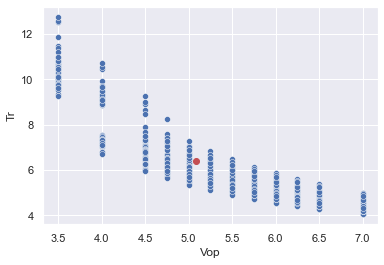

In [43]:
# finding ref Vop
Tr = float(summary_table[summary_table["platform"]=="6515"]["Tr(ms)"])
cell_gap = float(summary_table[summary_table["platform"]=="6515"]["Gap(um)"])


df = rt_total_table[rt_total_table["LC"] == "LCT-19-580"].copy()
df["Tr"] = df["Rise-mean (10-90)"]
df["Vop"] = df["Target Vpk"]

df = df.groupby(by=["ID", "Vop", "point"], as_index=False).mean()

sns.scatterplot(data=df, x="Vop", y="Tr")

# Let's try some fasion ML (XD
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(
    df,
    test_size = 0.3,
    random_state = 42
)
X_train = training_set[["Tr", "cell gap (um)"]].to_numpy()
y_train = training_set["Vop"].to_numpy()
X_test = test_set[["Tr", "cell gap (um)"]].to_numpy()
y_test = test_set["Vop"].to_numpy()
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
valid_data = scalar.transform([[Tr, cell_gap]])
# eXtreme Grandient Boostng Regression
from xgboost import XGBRegressor
f["Vop_ref_XGBR"] = XGBRegressor(
    n_estimators = 50,
    learning_rate = 0.1,
    max_depth = 3,
    gamma = 0.01,
    reg_lambda = 0.01
)
f["Vop_ref_XGBR"].fit(
    X_train, y_train,
    early_stopping_rounds = 10,
    eval_set = [(X_test, y_test)],
#     verbose = False
)
print("R2_train:", f["Vop_ref_XGBR"].score(X_train, y_train))
print("R2_test:", f["Vop_ref_XGBR"].score(X_test, y_test))
Vop_ref = float(f["Vop_ref_XGBR"].predict(valid_data))
print("Vop from Ref[Tr, cell gap]:", Vop_ref)
plt.plot(Vop_ref, Tr, "ro")
plt.show()

R2_train: 0.9739590883221004
R2_test: 0.9732830970780314
Vop from Ref[Tr, cell gap]: 4.857237929740755


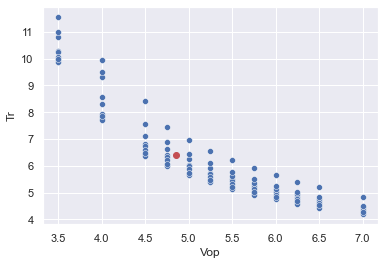

In [63]:
# finding ref Vop
Tr = float(summary_table[summary_table["platform"]=="6515"]["Tr(ms)"])
cell_gap = float(summary_table[summary_table["platform"]=="6515"]["Gap(um)"])


df = rt_total_table[rt_total_table["LC"] == "LCT-19-580"].copy()
df["Tr"] = df["Rise-mean (10-90)"]
df["Vop"] = df["Target Vpk"]

df = df.groupby(by=["ID", "Vop"], as_index=False).mean()

sns.scatterplot(data=df, x="Vop", y="Tr")

# Let's try some fasion ML (XD
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(
    df,
    test_size = 0.3,
    random_state = 42
)
X_train = training_set[["Tr", "cell gap(um) @ Fab1-RATS"]].to_numpy()
y_train = training_set["Vop"].to_numpy()
X_test = test_set[["Tr", "cell gap(um) @ Fab1-RATS"]].to_numpy()
y_test = test_set["Vop"].to_numpy()
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
valid_data = scalar.transform([[Tr, cell_gap]])
# SVR
from sklearn.svm import SVR
f["Vop_ref_SVR"] = SVR(
    kernel="rbf",
    C=1,
    gamma=1
)
f["Vop_ref_SVR"].fit(
    X_train, y_train
)
print("R2_train:", f["Vop_ref_SVR"].score(X_train, y_train))
print("R2_test:", f["Vop_ref_SVR"].score(X_test, y_test))
Vop_ref = float(f["Vop_ref_SVR"].predict(valid_data))
print("Vop from Ref[Tr, cell gap]:", Vop_ref)
plt.plot(Vop_ref, Tr, "ro")
plt.show()

[00:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "C", "kernel" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


R2_train: 0.949235548837887
R2_test: 0.92831899178547
Vop from Ref[Tr, cell gap]: 4.93012809753418


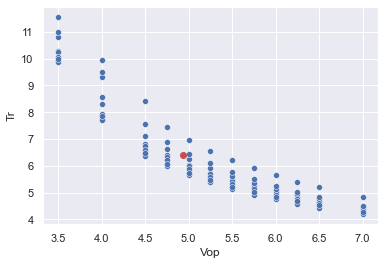

In [32]:
# finding ref Vop
Tr = float(summary_table[summary_table["platform"]=="6515"]["Tr(ms)"])
cell_gap = float(summary_table[summary_table["platform"]=="6515"]["Gap(um)"])


df = rt_total_table[rt_total_table["LC"] == "LCT-19-580"].copy()
df["Tr"] = df["Rise-mean (10-90)"]
df["Vop"] = df["Target Vpk"]
df["Vop2"] = df["Vop"] ** 2

df = df.groupby(by=["ID", "Vop"], as_index=False).mean()

sns.scatterplot(data=df, x="Vop", y="Tr")

# Let's try some fasion ML (XD
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(
    df,
    test_size = 0.3,
    random_state = 42
)
X_train = training_set[["Tr", "cell gap(um) @ Fab1-RATS"]].to_numpy()
y_train = training_set["Vop"].to_numpy()
X_test = test_set[["Tr", "cell gap(um) @ Fab1-RATS"]].to_numpy()
y_test = test_set["Vop"].to_numpy()
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
valid_data = scalar.transform([[Tr, cell_gap]])
# Linear regression
from sklearn.linear_model import LinearRegression
f["Vop_ref_LR"] = LinearRegression()
f["Vop_ref_LR"].fit(
    X_train, y_train
)
print("R2_train:", f["Vop_ref_SVR"].score(X_train, y_train))
print("R2_test:", f["Vop_ref_SVR"].score(X_test, y_test))
Vop_ref = float(f["Vop_ref_SVR"].predict(valid_data))
print("Vop from Ref[Tr, cell gap]:", Vop_ref)
plt.plot(Vop_ref, Tr, "ro")
plt.show()

[00:06:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "C", "kernel" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


R2_train: 0.949235548837887
R2_test: 0.92831899178547
Vop from Ref[Tr, cell gap]: 4.93012809753418


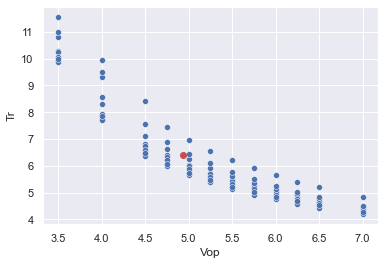

In [32]:
# finding ref Vop
Tr = float(summary_table[summary_table["platform"]=="6515"]["Tr(ms)"])
cell_gap = float(summary_table[summary_table["platform"]=="6515"]["Gap(um)"])


df = rt_total_table[rt_total_table["LC"] == "LCT-19-580"].copy()
df["Tr"] = df["Rise-mean (10-90)"]
df["Vop"] = df["Target Vpk"]

df = df.groupby(by=["ID", "Vop"], as_index=False).mean()

sns.scatterplot(data=df, x="Vop", y="Tr")

# Let's try some fasion ML (XD
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(
    df,
    test_size = 0.3,
    random_state = 42
)
X_train = training_set[["Tr", "cell gap(um) @ Fab1-RATS"]].to_numpy()
y_train = training_set["Vop"].to_numpy()
X_test = test_set[["Tr", "cell gap(um) @ Fab1-RATS"]].to_numpy()
y_test = test_set["Vop"].to_numpy()
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
valid_data = scalar.transform([[Tr, cell_gap]])
# SVR for plot
from sklearn.linear_model import LinearRegression
f["Vop_ref_SVR"] = XGBRegressor(
    kernel="rbf",
    C=1,
    gamma=1
)
f["Vop_ref_SVR"].fit(
    X_train, y_train
)
print("R2_train:", f["Vop_ref_SVR"].score(X_train, y_train))
print("R2_test:", f["Vop_ref_SVR"].score(X_test, y_test))
Vop_ref = float(f["Vop_ref_SVR"].predict(valid_data))
print("Vop from Ref[Tr, cell gap]:", Vop_ref)
plt.plot(Vop_ref, Tr, "ro")
plt.show()

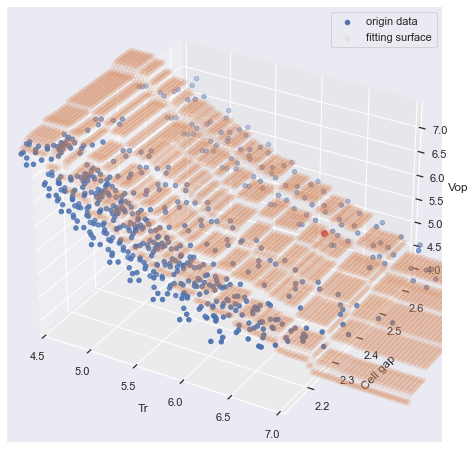

In [44]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection="3d")
df_tmp = df[df["Vop"]>=4.5]
ax.scatter(df_tmp["Tr"],df_tmp["cell gap (um)"],df_tmp["Vop"], label="origin data")

x1 = np.linspace(4,8,100)
x2 = np.linspace(2.2,2.6,100)
x1, x2 = np.meshgrid(x1, x2)
fitting_region = np.array(list(zip(x1.flatten(), x2.flatten())))
fitting_region_scalar = scalar.transform(fitting_region)
x3 = f["Vop_ref_XGBR"].predict(fitting_region_scalar)
ax.scatter(x1, x2, x3, label="fitting surface", alpha=0.1)
ax.plot(Tr, 2.5, Vop_ref, "ro")
plt.legend()
ax.set_xlabel("Tr")
ax.set_xlim([4.5, 7])
ax.set_ylabel("Cell gap")
ax.set_zlabel("Vop")
plt.savefig("output/Vop_ref_axo.png")
plt.show()

In [63]:
[Vop_ref, cell_gap]

[5.081605911254883, 2.5]

In [69]:
# make a copy of table we want, prevent to modified the original table
# If don't use copy(), df would be a ref to part of original table, it's dangerous.
df = rt_total_table.copy()
df["Vop"] = df["Target Vpk"]
df["RT"] = df["Rise-mean (10-90)"] + df["Fall-mean (10-90)"]
df["Tr"] = df["Rise-mean (10-90)"]
df["Tf"] = df["Fall-mean (10-90)"]
training_set, test_set = train_test_split(
    df,
    test_size = 0.1,
)

f["rt"] = {}
Tr = {}
Tf = {}
RT = {}

for LC in cond["LC"].unique():
    print(LC)
    f["rt"][LC] = {}
    X_train = training_set[training_set["LC"]==LC][["Vop", "cell gap (um)"]].to_numpy()
    X_test = test_set[test_set["LC"]==LC][["Vop", "cell gap (um)"]].to_numpy()
    # Standarize & Normalize
    scalar = StandardScaler().fit(X_train)
    X_train = scalar.transform(X_train)
    X_test = scalar.transform(X_test)
    valid_data = scalar.transform([[Vop_ref, cell_gap]])
    for item in ["Tr", "Tf", "RT"]:
        y_train = training_set[training_set["LC"]==LC][item].to_numpy()
        y_test = test_set[test_set["LC"]==LC][item].to_numpy()
        
        f["rt"][LC][f"{item}_XGBR"] = XGBRegressor(
            n_estimators = 3,
            learning_rate = 1,
            max_depth = 3,
            gamma = 1,
            reg_lambda = 1
        ).fit(
            X_train, y_train,
            early_stopping_rounds = 10,
            eval_set = [(X_test, y_test)],
            verbose = False, 
        )
        print(f'RT test {f["rt"][LC][f"{item}_XGBR"].score(X_test, y_test):.2f}')
        ans = float(f["rt"][LC][f"{item}_XGBR"].predict(valid_data))
        print(f"{LC}: {item}: {ans:.2f} ms")



LCT-19-580
RT test 0.95
LCT-19-580: Tr: 6.28 ms
RT test 0.83
LCT-19-580: Tf: 6.49 ms
RT test 0.85
LCT-19-580: RT: 12.91 ms
MOX-1
RT test 0.93
MOX-1: Tr: 7.90 ms
RT test 0.96
MOX-1: Tf: 8.08 ms
RT test 0.90
MOX-1: RT: 15.31 ms


In [58]:
f

{'Vop_ref_XGBR': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None),
 'd_Tf': {'LCT-19-580': LinearRegression(), 'MOX-1': LinearRegression()},
 'd_Tr': {'LCT-19-580': LinearRegression(), 'MOX-1': LinearRegression()},
 'd_RT': {'LCT-19-580': LinearRegression(), 'MOX-1': LinearRegression()},
 'opt': {'LCT-19-580': {'T_XGBR': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
    

In [46]:
print(f["d_Tr"]['LCT-19-580'].predict([[Vop_ref, 2.5]]))
print(f["d_Tf"]['LCT-19-580'].predict([[Vop_ref, 2.5]]))
print(f["d_RT"]['LCT-19-580'].predict([[Vop_ref, 2.5]]))
print(f["d_Tr"]['MOX-1'].predict([[Vop_ref, 2.5]]))
print(f["d_Tf"]['MOX-1'].predict([[Vop_ref, 2.5]]))
print(f["d_RT"]['MOX-1'].predict([[Vop_ref, 2.5]]))

[6.72792125]
[7.08007124]
[13.80799249]
[7.03974257]
[7.14682754]
[14.18657012]


In [47]:
# 3. opt cell gap table
opt_total_table = pd.merge(opt_raw,
                           total_table, 
                           left_on=["ID", "Point"], 
                           right_on=["id", "point"], 
                           how="left")

In [48]:
opt_total_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5928 entries, 0 to 5927
Data columns (total 79 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Data                 5928 non-null   object 
 1   M_Time               5928 non-null   object 
 2   ID                   5928 non-null   object 
 3   Point                5928 non-null   int64  
 4   Station              5928 non-null   object 
 5   Operator             5928 non-null   int64  
 6   Voltage              5928 non-null   float64
 7   I.Time               5928 non-null   int64  
 8   AR_T%(⊥)             5928 non-null   float64
 9   AR_T%(//)            5928 non-null   float64
 10  LCM_X%               5928 non-null   float64
 11  LCM_Y%               5928 non-null   float64
 12  LCM_Z%               5928 non-null   float64
 13  RX                   5928 non-null   float64
 14  RY                   5928 non-null   float64
 15  RZ                   5928 non-null   f

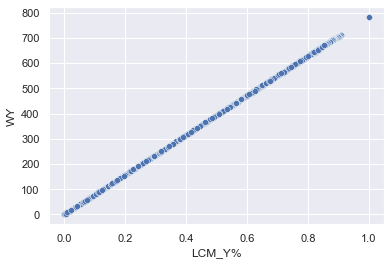

In [49]:
sns.scatterplot(data=opt_total_table[["LCM_Y%","WY","WY'"]], x="LCM_Y%", y="WY")
plt.show()

In [50]:
# deal with empty value
opt_total_table = opt_total_table[opt_total_table["Voltage"] != 1]

In [51]:
opt_total_table["ID"].unique()

array(['T108C001NM21', 'T108C001NM27', 'T108C001NM2D', 'T108C001NM2J',
       'T108C001NM2P', 'T108C001NM2V', 'T108C001NM22', 'T108C001NM28',
       'T108C001NM2E', 'T108C001NM2K', 'T108C001NM2Q', 'T108C001NM2W',
       'T108C001NM29', 'T108C001NM2F', 'T108C001NM2L', 'T108C001NM2R',
       'T108C001NM2X', 'T108C001NM24', 'T108C001NM2A'], dtype=object)

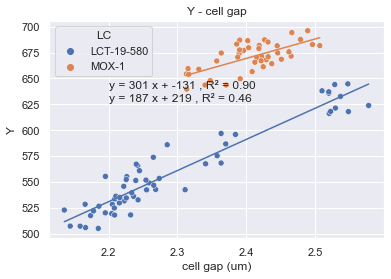

In [53]:
# MAX Transparent compare
# choossing data under 2.6 um
# Is WY has limit?
sns.scatterplot(data = opt_total_table[opt_total_table["cell gap (um)"] < 2.6].groupby(by=["ID", "point"]).max(),
            x = "cell gap (um)",
            y = "WY",
            hue = "LC")
plt.xlabel("cell gap (um)")
plt.ylabel("Y")
plt.title("Y - cell gap")
reg = {}
X = {}
y = {}
text_pos = np.array([2.20, 640])
text_shift = np.array([0, -12])
for LC in df["LC"].unique():
    tmp_df = opt_total_table[opt_total_table["cell gap (um)"] < 2.6].groupby(by=["ID", "point"],as_index=False).max()
    tmp_df = tmp_df[tmp_df["LC"] == LC]
    X[LC] = [[x] for x in tmp_df["cell gap (um)"]]
    y[LC] = [float(y) for y in tmp_df["WY"]]
    reg[LC] = LinearRegression().fit(X[LC],y[LC])
    X_pred = [[x] for x in np.linspace(np.min(X[LC]), np.max(X[LC]), 100)]
    y_pred = reg[LC].predict(X_pred)
    plt.plot(X_pred, y_pred)
    plt.text(text_pos[0], text_pos[1], f'y = {reg[LC].coef_[0]:.0f} x + {reg[LC].intercept_:.0f} , R\u00B2 = {reg[LC].score(X[LC],y[LC]):.2f}')
    text_pos += text_shift
plt.show()

In [54]:
Y_gain = (reg["MOX-1"].predict([[2.5]])-reg["LCT-19-580"].predict([[2.5]]))/reg["LCT-19-580"].predict([[2.5]])
print(f"穿透率增加 {float(Y_gain)*100:.2f} %")

穿透率增加 10.77 %


In [80]:
# So, let's do batch things
df_V99RT = pd.DataFrame({
    f"V\u2089\u2089 (volt)":[],
    "RT (ms)": [],
    "LC%":[],
    "cell gap (um)": [],
    "ID": []
})

for ID in rt_total_table["ID"].unique():
    df_tmp = opt_total_table[opt_total_table["ID"] == ID][["Voltage","LCM_Y%"]]

    df_tmp = df_tmp.groupby(by="Voltage",as_index=False).mean()
    df_tmp["Vop"] = df_tmp["Voltage"]/2.0
    df_tmp["T%"] = df_tmp["LCM_Y%"]/np.max(df_tmp["LCM_Y%"])
    df_tmp["LC%"] = df_tmp["LCM_Y%"]

    # scipy interploate function, can get any value between the range,
    # using the interpolation of nearest two point.
    
    # trucate the data out of T% = 100%
    idx = df_tmp[df_tmp["T%"]==1].index[0]
    df_tmp_trunc = df_tmp.iloc[0:(idx+1),:]
    V = interp1d(df_tmp_trunc["T%"].to_numpy(), df_tmp_trunc["Vop"].to_numpy())
    V99 = V(0.99)
    
    df_tmp = rt_total_table[rt_total_table["ID"] == ID][["Target Vpk","Rise-mean (10-90)","Fall-mean (10-90)","cell gap(um) @ Fab1-RATS"]].groupby(by="Target Vpk", as_index=False).mean()
    df_tmp["RT (ms)"] = df_tmp["Rise-mean (10-90)"] + df_tmp["Fall-mean (10-90)"]
    df_tmp["Vop"] = df_tmp["Target Vpk"]
    
    if V99 > np.max(df_tmp["Vop"]):
        print(f"ID: {ID}, V99 ={V99} is larger than opt max Vop({np.max(df_tmp['Vop'])}), by pass.")
        continue
    RT = interp1d(df_tmp["Vop"].to_numpy(), df_tmp["RT (ms)"].to_numpy())
    df_tmp = pd.DataFrame({
        f"V\u2089\u2089 (volt)":[V99],
        "RT (ms)": [RT(V99)],
        "cell gap (um)": [df_tmp.loc[0,"cell gap(um) @ Fab1-RATS"]],
        "ID": [ID]
    })
    df_V99RT = pd.concat([df_V99RT, df_tmp])
df_V99RT = pd.merge(df_V99RT, cond, left_on="ID", right_on="id", how="left")

df_V99RT = df_V99RT.astype({
    f"V\u2089\u2089 (volt)": "float64",
    "RT (ms)": "float64"
})

In [57]:
# find Vxx, Wx, Wy, T%
# using more XGB~
f["opt"] = {}
df = opt_total_table.copy()
df["T%"] = opt_total_table.groupby(by=["ID", "Point"])["LCM_Y%"].apply(lambda x: 100*x / float(x.max()))
df["Vop"] = df["Voltage"]/2.0
df["LC%"] = df["LCM_Y%"]
df = df[df["Vop"] > 2]
training_set, test_set = train_test_split(
    df,
    test_size = 0.2,
#     random_state = 42
)
LCp = {}
T = {}
Wx = {}
Wy = {}
for LC in cond["LC"].unique():
    print(LC)
    f["opt"][LC] = {}
    X_train = training_set[training_set["LC"]==LC][["Vop", "cell gap (um)"]].to_numpy()
    y_train = training_set[training_set["LC"]==LC]["T%"].to_numpy()
    X_test = test_set[test_set["LC"]==LC][["Vop", "cell gap (um)"]].to_numpy()
    y_test = test_set[test_set["LC"]==LC]["T%"].to_numpy()
    # Standarize & Normalize
    scalar = StandardScaler().fit(X_train)
    X_train = scalar.transform(X_train)
    X_test = scalar.transform(X_test)
    valid_data = scalar.transform([[Vop_ref, cell_gap]])
    # eXtreme Grandient Boostng Regression
    f["opt"][LC]["T_XGBR"] = XGBRegressor(
        n_estimators = 3,
        learning_rate = 1,
        max_depth = 3,
        gamma = 1,
        reg_lambda = 1
    )
    f["opt"][LC]["T_XGBR"].fit(
        X_train, y_train,
        early_stopping_rounds = 10,
        eval_set = [(X_test, y_test)],
        verbose = False, 
    )
#     print("R2_train:", f["opt"][LC]["T_XGBR"].score(X_train, y_train))
    print("R2_test:", f["opt"][LC]["T_XGBR"].score(X_test, y_test))
    T[LC] = float(f["opt"][LC]["T_XGBR"].predict(valid_data))
    print("T%", LC ,"", T[LC])
    y_train = training_set[training_set["LC"]==LC]["W_x"].to_numpy()
    y_test = test_set[test_set["LC"]==LC]["W_x"].to_numpy()
    f["opt"][LC]["Wx_XGBR"] = XGBRegressor(
        n_estimators = 1000,
        learning_rate = 0.01,
        max_depth = 7,
        gamma = 0.001,
        reg_lambda = 0.1,
    )
    f["opt"][LC]["Wx_XGBR"].fit(
        X_train, y_train,
        early_stopping_rounds = 10,
        eval_set = [(X_test, y_test)],
        verbose = False, 
    )
#     print("R2_train:", f["opt"][LC]["Wx_XGBR"].score(X_train, y_train))
    print("R2_test:", f["opt"][LC]["Wx_XGBR"].score(X_test, y_test))
    Wx[LC] = float(f["opt"][LC]["Wx_XGBR"].predict(valid_data))
    print("Wx", LC ,"", Wx[LC])
    
    y_train = training_set[training_set["LC"]==LC]["W_y"].to_numpy()
    y_test = test_set[test_set["LC"]==LC]["W_y"].to_numpy()
    f["opt"][LC]["Wy_XGBR"] = XGBRegressor(
        n_estimators = 100,
        learning_rate = 1,
        max_depth = 5,
        gamma = 0.0001,
        reg_lambda = 0,
    )
    f["opt"][LC]["Wy_XGBR"].fit(
        X_train, y_train,
        early_stopping_rounds = 10,
        eval_set = [(X_test, y_test)],
        verbose = False, 
    )
#     print("R2_train:", f["opt"][LC]["Wy_XGBR"].score(X_train, y_train))
    print("R2_test:", f["opt"][LC]["Wy_XGBR"].score(X_test, y_test))
    Wy[LC] = float(f["opt"][LC]["Wy_XGBR"].predict(valid_data))
    print("Wy", LC ,"", Wy[LC])
    
    y_train = training_set[training_set["LC"]==LC]["LC%"].to_numpy()
    y_test = test_set[test_set["LC"]==LC]["LC%"].to_numpy()
    # Standarize & Normalize
    scalar = StandardScaler().fit(X_train)
    X_train = scalar.transform(X_train)
    X_test = scalar.transform(X_test)
    valid_data = scalar.transform([[Vop_ref, cell_gap]])
    # eXtreme Grandient Boostng Regression
    f["opt"][LC]["LC_XGBR"] = XGBRegressor(
        n_estimators = 3,
        learning_rate = 1,
        max_depth = 3,
        gamma = 1,
        reg_lambda = 1
    )
    f["opt"][LC]["LC_XGBR"].fit(
        X_train, y_train,
        early_stopping_rounds = 10,
        eval_set = [(X_test, y_test)],
        verbose = False, 
    )
    print("R2_test:", f["opt"][LC]["LC_XGBR"].score(X_test, y_test))
    LCp[LC] = float(f["opt"][LC]["LC_XGBR"].predict(valid_data))
    print("LC%", LC ,"",LCp[LC])   
    print()


LCT-19-580
R2_test: 0.9927364331822578
T% LCT-19-580  92.66368865966797
R2_test: 0.8251652973182378
Wx LCT-19-580  0.26938194036483765
R2_test: 0.9595442007770161
Wy LCT-19-580  0.26958659291267395
R2_test: 0.9241832222101726
LC% LCT-19-580  0.7786678671836853

MOX-1
R2_test: 0.9931778284750902
T% MOX-1  94.57981872558594
R2_test: 0.9583760334032849
Wx MOX-1  0.2922833561897278
R2_test: 0.994850738472534
Wy MOX-1  0.29398313164711
R2_test: 0.9370902333458596
LC% MOX-1  0.845836341381073



In [59]:
[Vop_ref, cell_gap]

[5.081605911254883, 2.5]

<AxesSubplot:xlabel='Vop', ylabel='T%'>

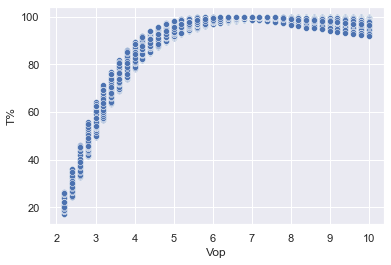

In [61]:
sns.scatterplot(data=df, x="Vop", y="T%")
plt.show()

In [62]:
opt_total_table.groupby(by=["ID", "Point"])["LCM_Y%"]